C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.5515714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000



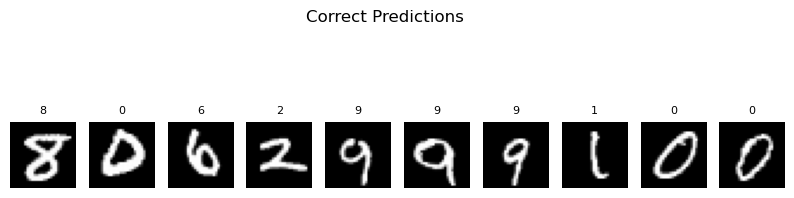

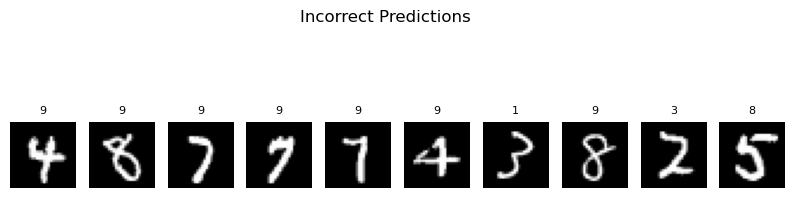

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=Fale)
y = y.astype(int)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train & Predict
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy & Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Show correct & incorrect predictions
correct = np.where(y_test == y_pred)[0]
incorrect = np.where(y_test != y_pred)[0]

for title, indices in [("Correct", correct), ("Incorrect", incorrect)]:
    plt.figure(figsize=(10, 3))
    for i, idx in enumerate(indices[:10]):
        plt.subplot(1, 10, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"{y_pred[idx]}", fontsize=8)
        plt.axis('off')
    plt.suptitle(f"{title} Predictions")
    plt.show()
